# Data Analysis - Lab 
### M. Sébastien MASCHA & M. Pierre SAUVAGE
### ISEP Paris   |   2019-2020
<br/>
<br/>

___

# Exercice A - 
*Description*

### Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- SciPy : a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

In [20]:
# coding: utf-8

import data

# data analysis
from math import sqrt,pi,exp
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<br/>
<br/>

___
### Question 1 - 

In [38]:
titanic_train_df = pd.read_csv("data/titanic_train.csv", sep =',')
titanic_test_df = pd.read_csv("data/titanic_test.csv", sep =',')

titanic_combine_df = [titanic_train_df, titanic_test_df]

titanic_test_df.head()

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_train_df.info()
print('_'*50+'\n')
titanic_test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 13 columns):
PassengerId    593 non-null int64
Survived       593 non-null int64
Pclass         593 non-null int64
Name           593 non-null object
FullName       593 non-null object
Sex            593 non-null object
Age            473 non-null float64
SibSp          593 non-null int64
Parch          593 non-null int64
Ticket         593 non-null object
Fare           593 non-null float64
Cabin          143 non-null object
Embarked       592 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 60.4+ KB
__________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 13 columns):
PassengerId    298 non-null int64
Survived       298 non-null int64
Pclass         298 non-null int64
Name           298 non-null object
FullName       298 non-null object
Sex            298 non-null object
Age            2

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.

Cabin > Age are incomplete in case of test dataset.

___

Seven features are integer or floats. Six in case of test dataset.

Five features are strings (object).

In [23]:
titanic_train_df.describe()

# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,593.000000,593.000000,593.000000,473.000000,593.000000,593.000000,593.000000
mean,595.000000,0.397976,2.271501,30.122283,0.475548,0.379427,33.825554
std,171.328632,0.489894,0.847580,14.395486,1.009997,0.811269,51.746618
min,299.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,447.000000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,595.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.458300
75%,743.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Survived is a categorical feature with 0 or 1 values.

Around 38% samples survived representative of the actual survival rate at 32%.

Most passengers (> 75%) did not travel with parents or children.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80.


In [24]:
titanic_train_df.describe(include=['O'])

,Name,FullName,Sex,Ticket,Cabin,Embarked
count,593,593,593,593,143,592
unique,476,549,2,487,116,3
top,Andersson,Miss. Mary,male,1601,B96 B98,S
freq,5,6,385,5,4,429


What is the distribution of categorical features?

Names are unique across the dataset (count=unique=891)

Sex variable as two possible values with 65% male (top=male, freq=577/count=891).

Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

Embarked takes three possible values. S port used by most passengers (top=S)

Ticket feature has high ratio (22%) of duplicate values (unique=681).

## Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

### Completing

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
### Correcting.

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
Creating.

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.

We may want to engineer the Name feature to extract Title as a new feature.

We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.

We may also want to create a Fare range feature if it helps our analysis.
### Classifying

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.

Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).

SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [25]:
titanic_train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.688312
1,2,0.500000
2,3,0.215873


In [26]:
titanic_train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.759615
1,male,0.202597


In [27]:
titanic_train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
2,2,0.600000
1,1,0.566434
0,0,0.345588
3,3,0.250000
4,4,0.000000
5,5,0.000000
6,8,0.000000


In [28]:
titanic_train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.750000
1,1,0.637500
2,2,0.520000
0,0,0.345133
4,4,0.000000
5,5,0.000000
6,6,0.000000


## Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

### Observations.

Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.
### Decisions

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

We should consider Age (our assumption classifying #2) in our model training.
Complete the Age feature for null values (completing #1).
We should band age groups (creating #3).

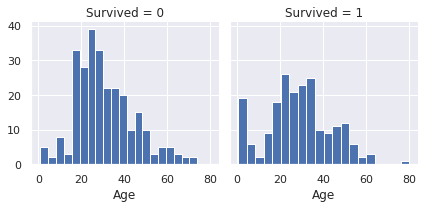

In [29]:
g = sns.FacetGrid(titanic_train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

### Observations.

Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
Pclass varies in terms of Age distribution of passengers.
### Decisions.

Consider Pclass for model training.

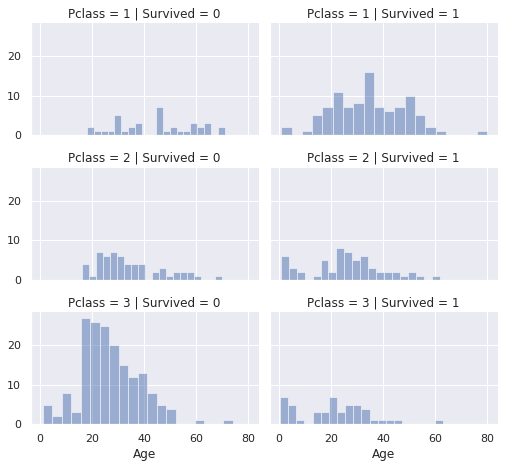

In [31]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(titanic_train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features
Now we can correlate categorical features with our solution goal.

### Observations.

Female passengers had much better survival rate than males. Confirms classifying (#1).
Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
Decisions.

### Add Sex feature to model training.
Complete and add Embarked feature to model training.

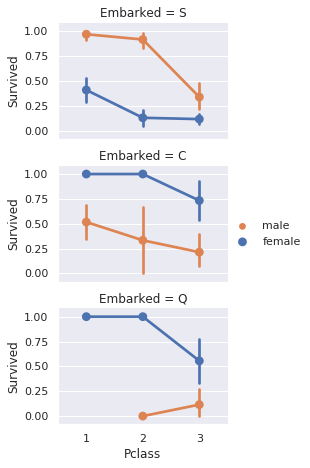

In [35]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(titanic_train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Bonjour 